In [105]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df = pd.read_csv('final_cleaned_v2.csv')

# property_type vs sector

<Axes: xlabel='sector', ylabel='property_type'>

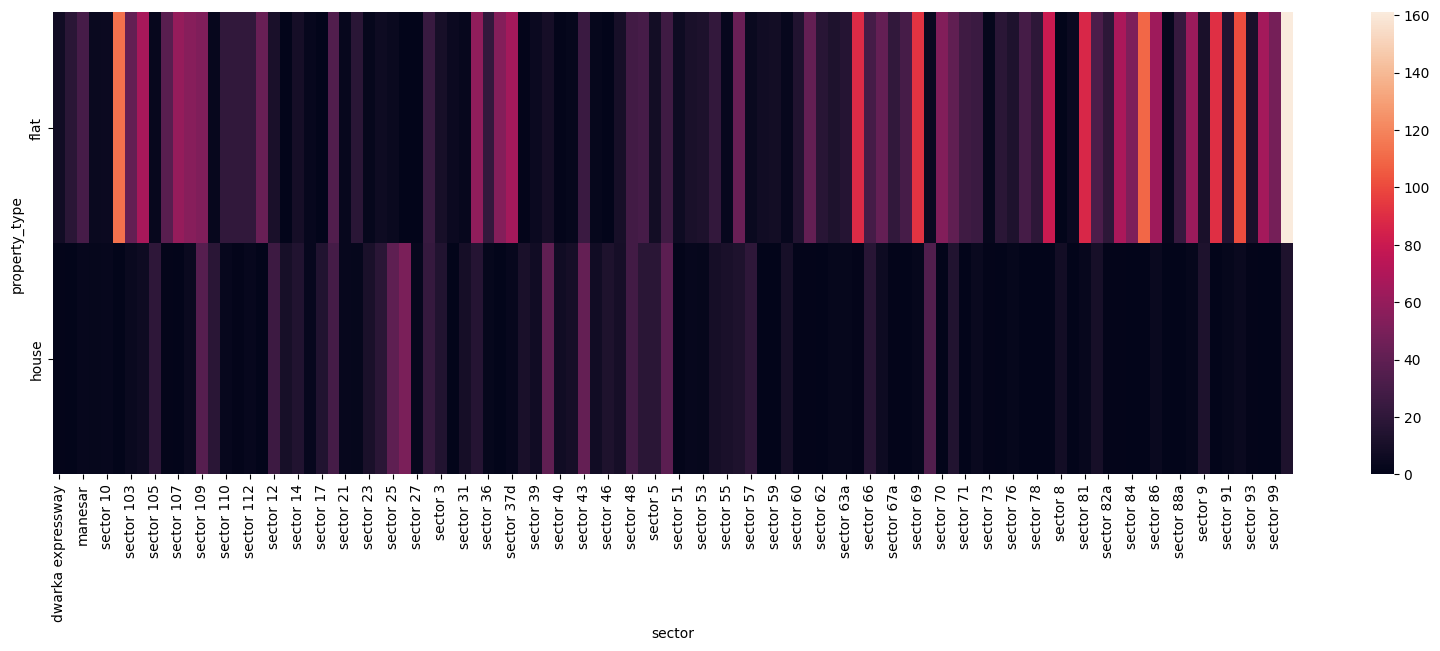

In [54]:
plt.figure(figsize=(20,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector']))

**Sectors greater than 70 has higher count of flats.**

# property_type vs price

<Axes: xlabel='property_type', ylabel='price'>

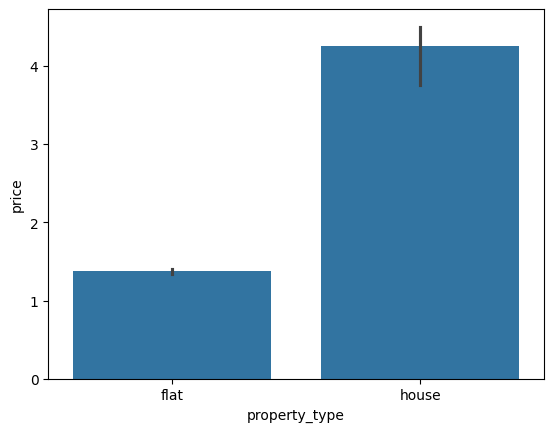

In [13]:
sns.barplot(x='property_type',y='price',data=df,estimator=np.median)


flats has a median price of 1.5 Crores  
Houses has a median price of 4 Crores

<Axes: xlabel='property_type', ylabel='price'>

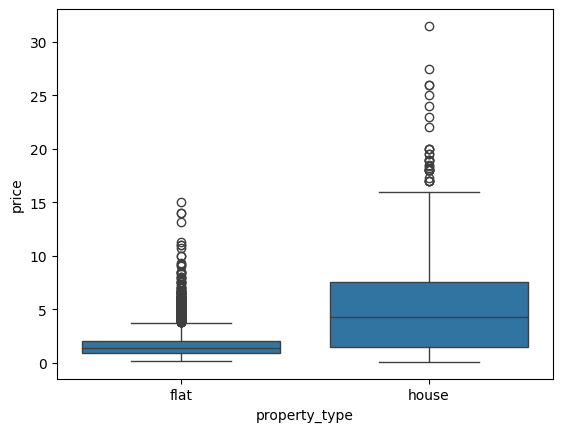

In [14]:
sns.boxplot(x='property_type',y='price',data=df)

**lot's of outliers price between flats and houses**

In [23]:
# removing that crazy outlier
df = df[df['built_up_area'] != 737147]

# property_type vs builtup_area

<Axes: xlabel='property_type', ylabel='built_up_area'>

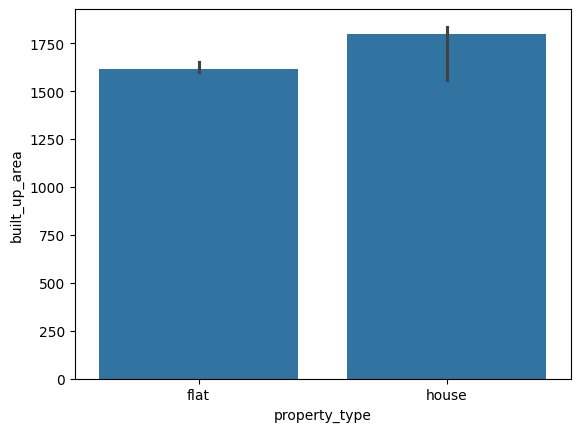

In [24]:
sns.barplot(x='property_type',y='built_up_area',data=df,estimator=np.median)

<Axes: xlabel='property_type', ylabel='built_up_area'>

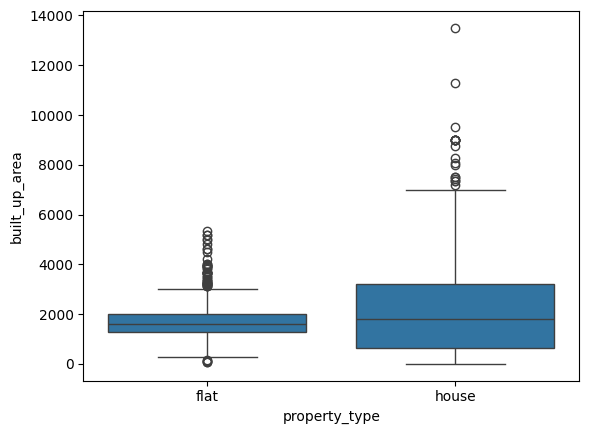

In [25]:
sns.boxplot(x='property_type',y='built_up_area',data=df)

**flats and House has almost simillar median value of built_up_area** 

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

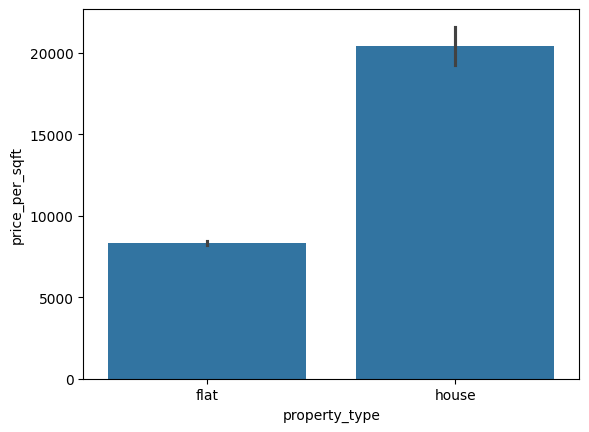

In [27]:
sns.barplot(x='property_type',y='price_per_sqft',data=df,estimator=np.median)

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

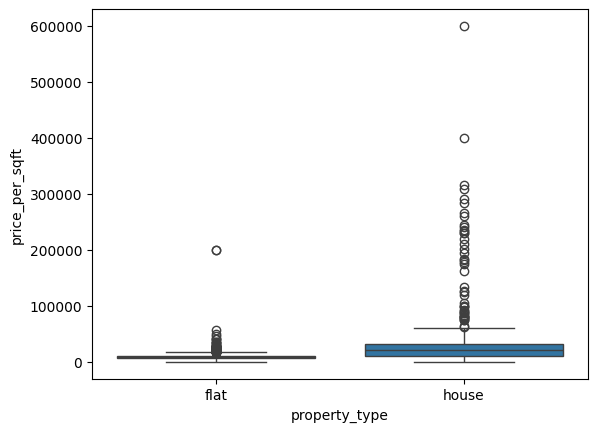

In [28]:
sns.boxplot(x='property_type',y='price_per_sqft',data=df)

In [30]:
df[df['price_per_sqft']>100000].shape

(30, 23)

In [67]:
# df[df['price_per_sqft']>100000]

<Axes: xlabel='bedRoom', ylabel='property_type'>

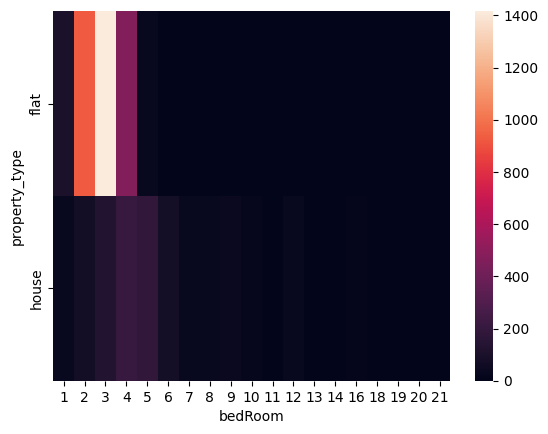

In [36]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

<Axes: xlabel='bedRoom', ylabel='property_type'>

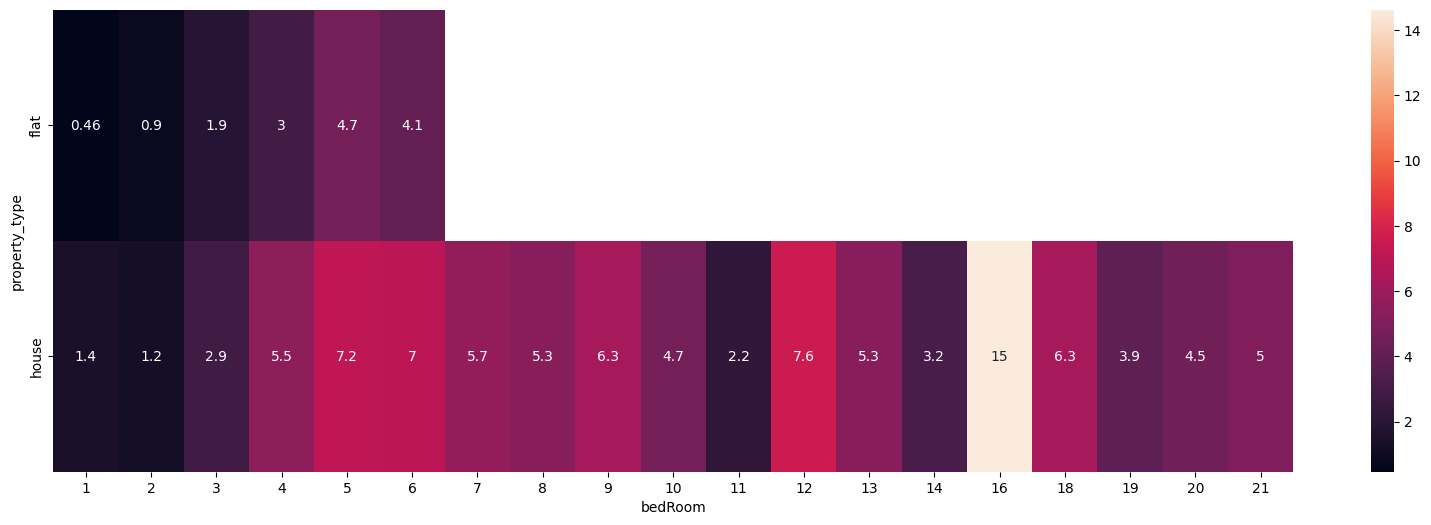

In [70]:
plt.figure(figsize=(20,6))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)


**flats with 2-4 bedrooms are highest of count.**  
**most of the house and flats have less than 10 bedrooms**


In [38]:
df[df['bedRoom'] > 10].shape

(52, 23)

In [58]:
# Checking outliers 
# df[df['bedRoom'] > 10]

<Axes: xlabel='property_type', ylabel='floorNum'>

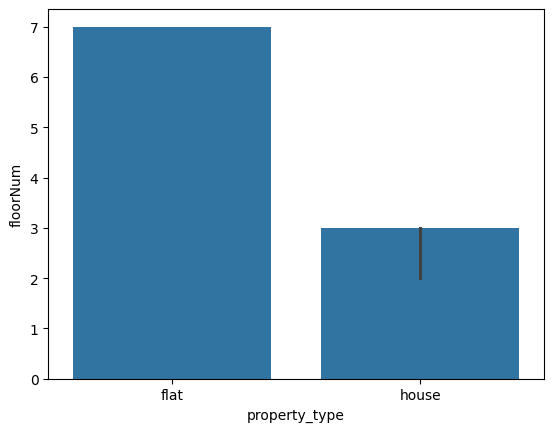

In [41]:
sns.barplot(x='property_type',y='floorNum',data=df,estimator=np.median)

<Axes: xlabel='property_type', ylabel='floorNum'>

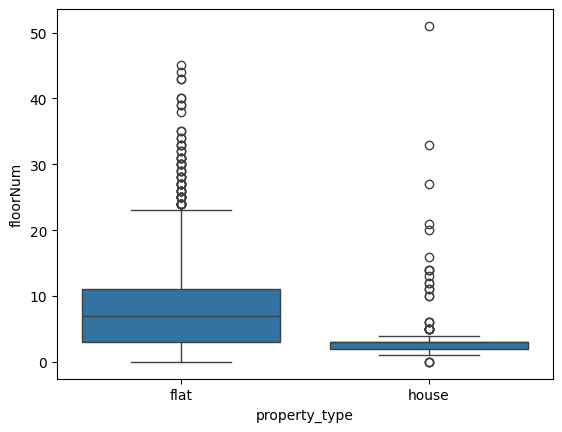

In [42]:
sns.boxplot(x='property_type',y='floorNum',data=df)


In [43]:
df[(df['floorNum'] > 10) & (df['property_type']=='house')].shape

(14, 23)

In [57]:
# checking outliers
# df[(df['floorNum'] > 10) & (df['property_type']=='house')]

<Axes: xlabel='agePossession', ylabel='property_type'>

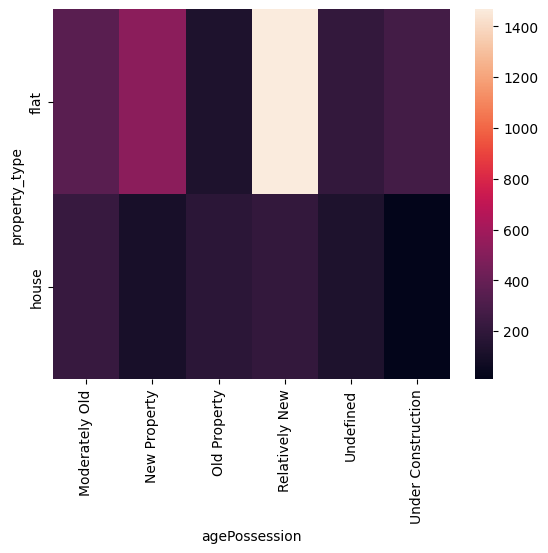

In [49]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

**Relatively New flats has higher counts**

<Axes: xlabel='agePossession', ylabel='property_type'>

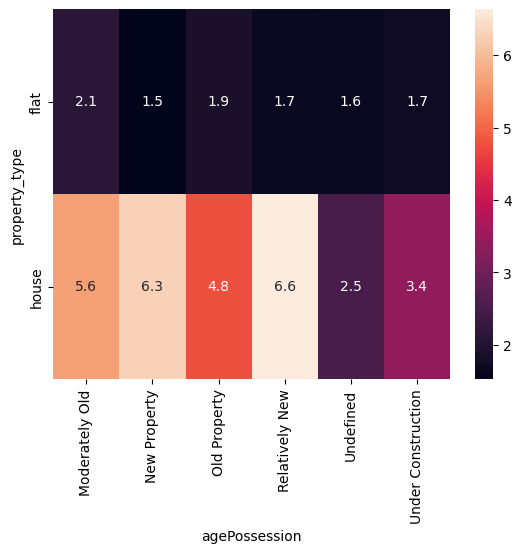

In [52]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='agePossession',values='price',aggfunc='mean'),annot=True)

**This is a multivariate analysis using pivot table as mean price aggregate function**

<Axes: xlabel='furnishing_type', ylabel='property_type'>

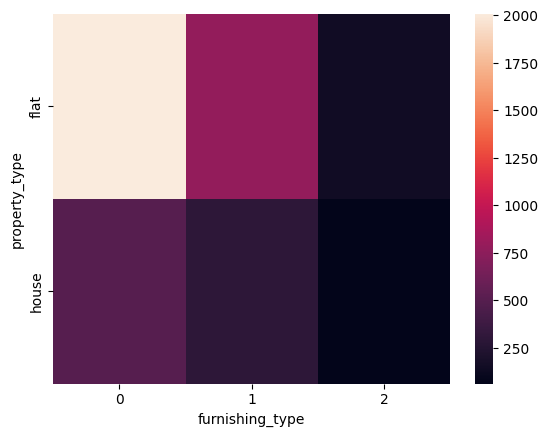

In [62]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

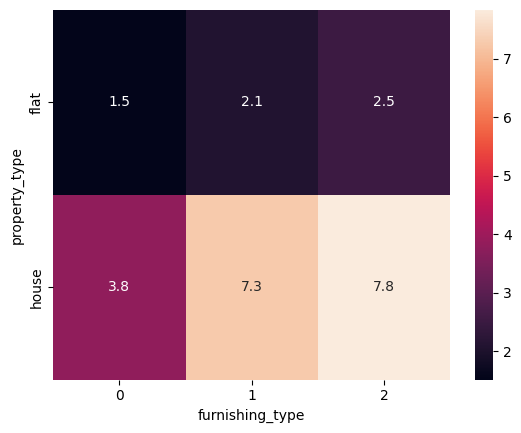

In [65]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='property_type', ylabel='luxury_score'>

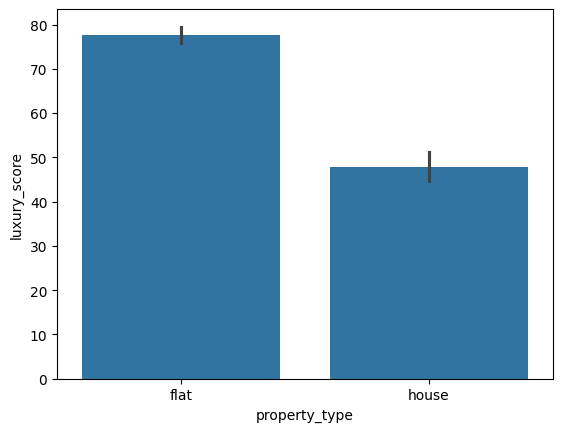

In [72]:
sns.barplot(x='property_type',y='luxury_score',data=df)

<Axes: xlabel='property_type', ylabel='luxury_score'>

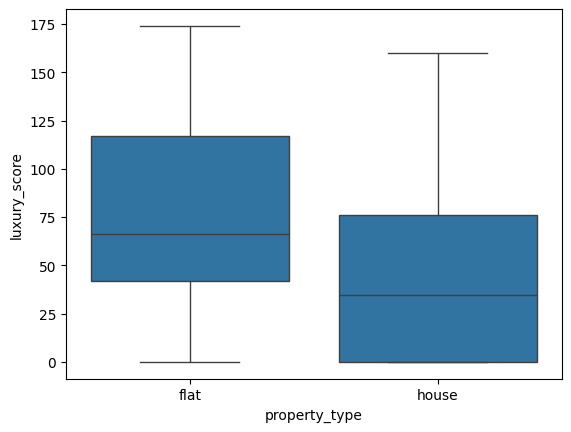

In [71]:
sns.boxplot(x='property_type',y='luxury_score',data=df)

# Price

<Axes: xlabel='bedRoom', ylabel='price'>

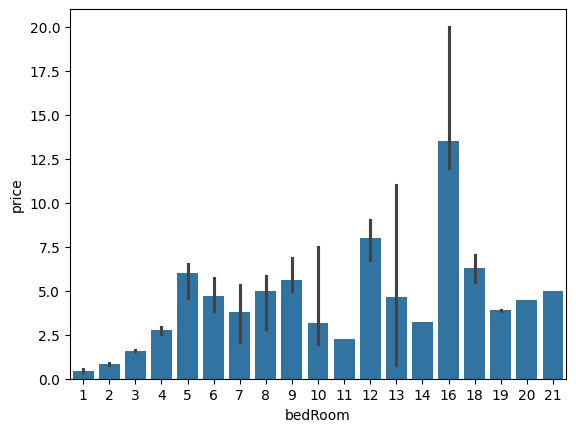

In [74]:
sns.barplot(x='bedRoom',y='price',data=df,estimator=np.median)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'New Property'),
  Text(1, 0, 'Under Construction'),
  Text(2, 0, 'Relatively New'),
  Text(3, 0, 'Old Property'),
  Text(4, 0, 'Moderately Old'),
  Text(5, 0, 'Undefined')])

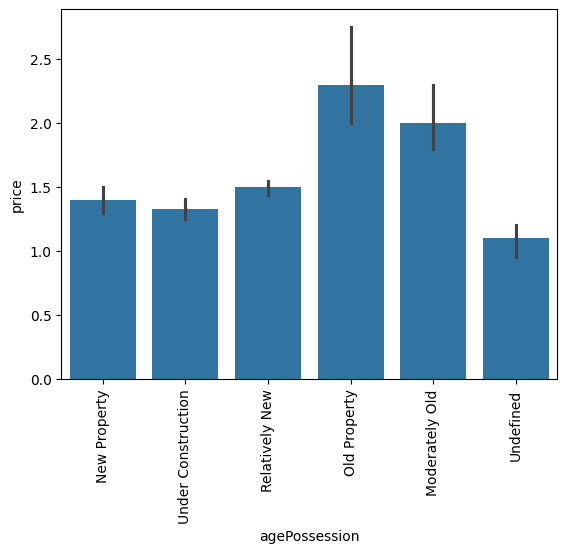

In [77]:
sns.barplot(x='agePossession',y='price',data=df,estimator=np.median)
plt.xticks(rotation=90)

<Axes: xlabel='furnishing_type', ylabel='price'>

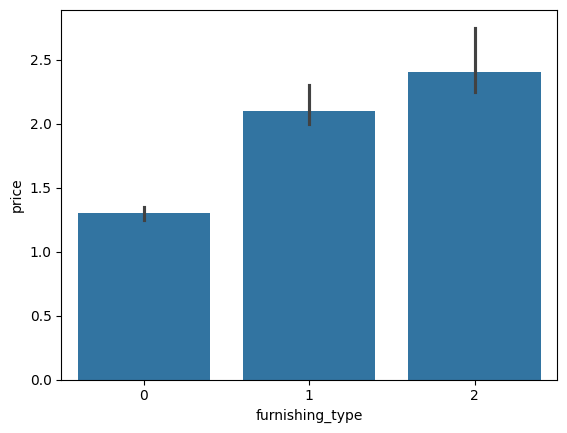

In [78]:
sns.barplot(x='furnishing_type',y='price',data=df,estimator=np.median)

In [85]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])

<Axes: >

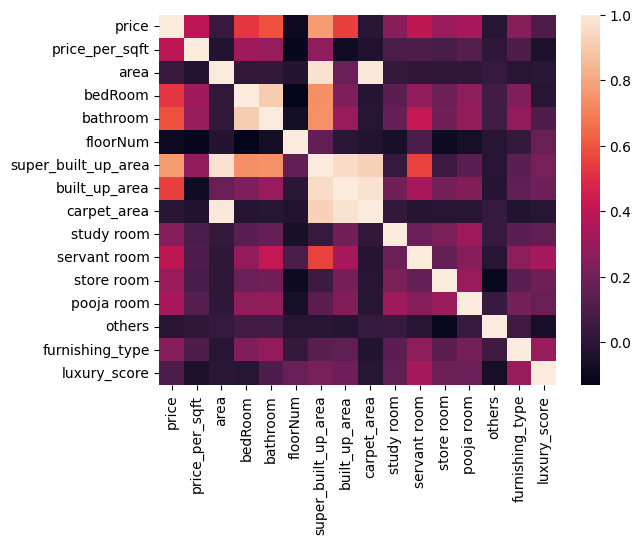

In [88]:
sns.heatmap(numerical_features.corr())

In [92]:
numerical_features.corr()['price'].sort_values()

floorNum              -0.091301
carpet_area           -0.010146
others                -0.006557
area                   0.035502
luxury_score           0.097121
furnishing_type        0.253527
study room             0.255702
store room             0.306110
pooja room             0.340483
price_per_sqft         0.396901
servant room           0.400055
bedRoom                0.524576
built_up_area          0.549644
bathroom               0.591407
super_built_up_area    0.770988
price                  1.000000
Name: price, dtype: float64

<Axes: xlabel='built_up_area', ylabel='price'>

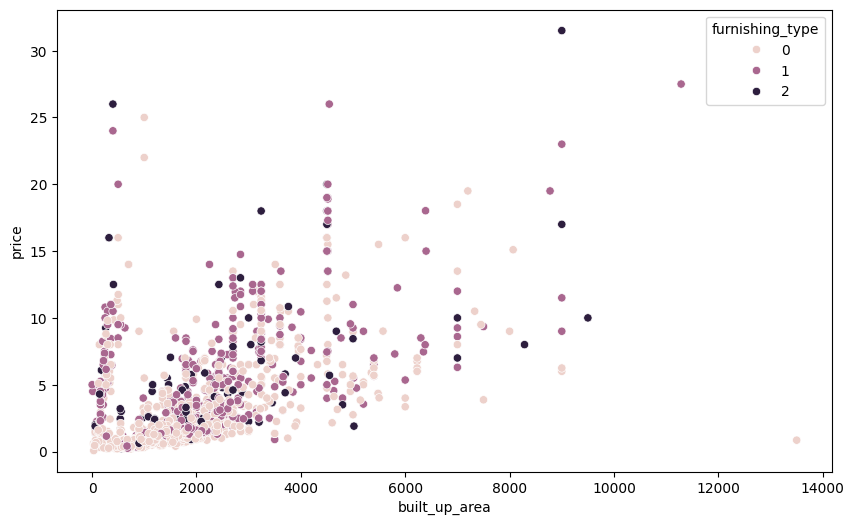

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='built_up_area',y='price',data=df,hue='furnishing_type')

<Axes: xlabel='built_up_area', ylabel='price'>

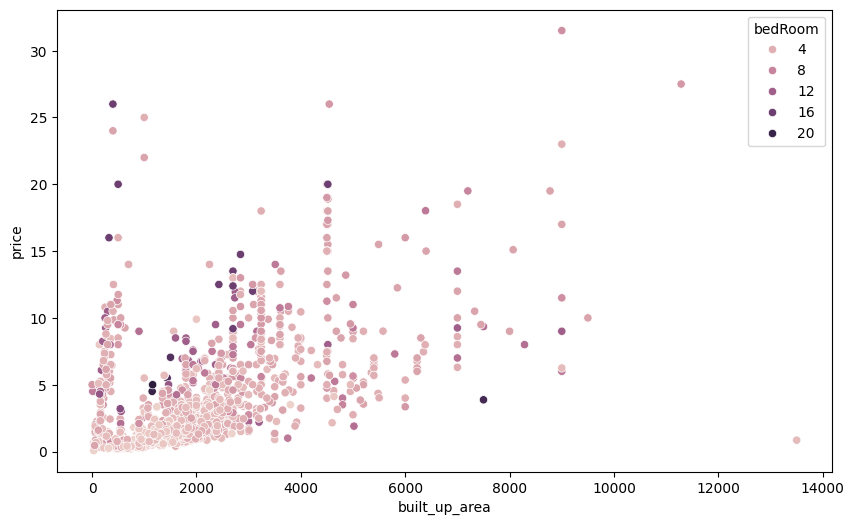

In [101]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='built_up_area',y='price',data=df,hue='bedRoom')

<Axes: xlabel='luxury_score', ylabel='price'>

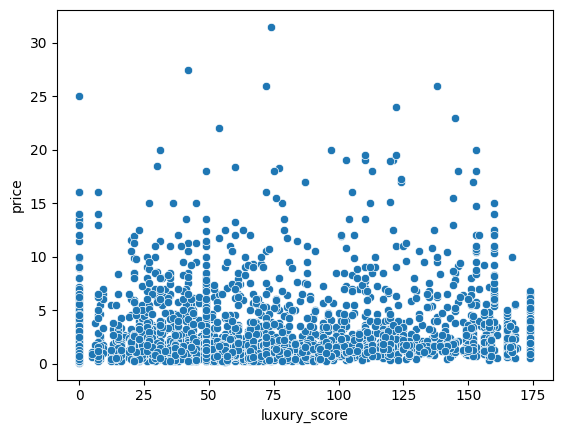

In [102]:
sns.scatterplot(x='luxury_score',y='price',data=df)

# avg_sector_price

In [121]:
avg_sector_price = df.groupby('sector')['price'].mean().reset_index()

<Axes: ylabel='sector'>

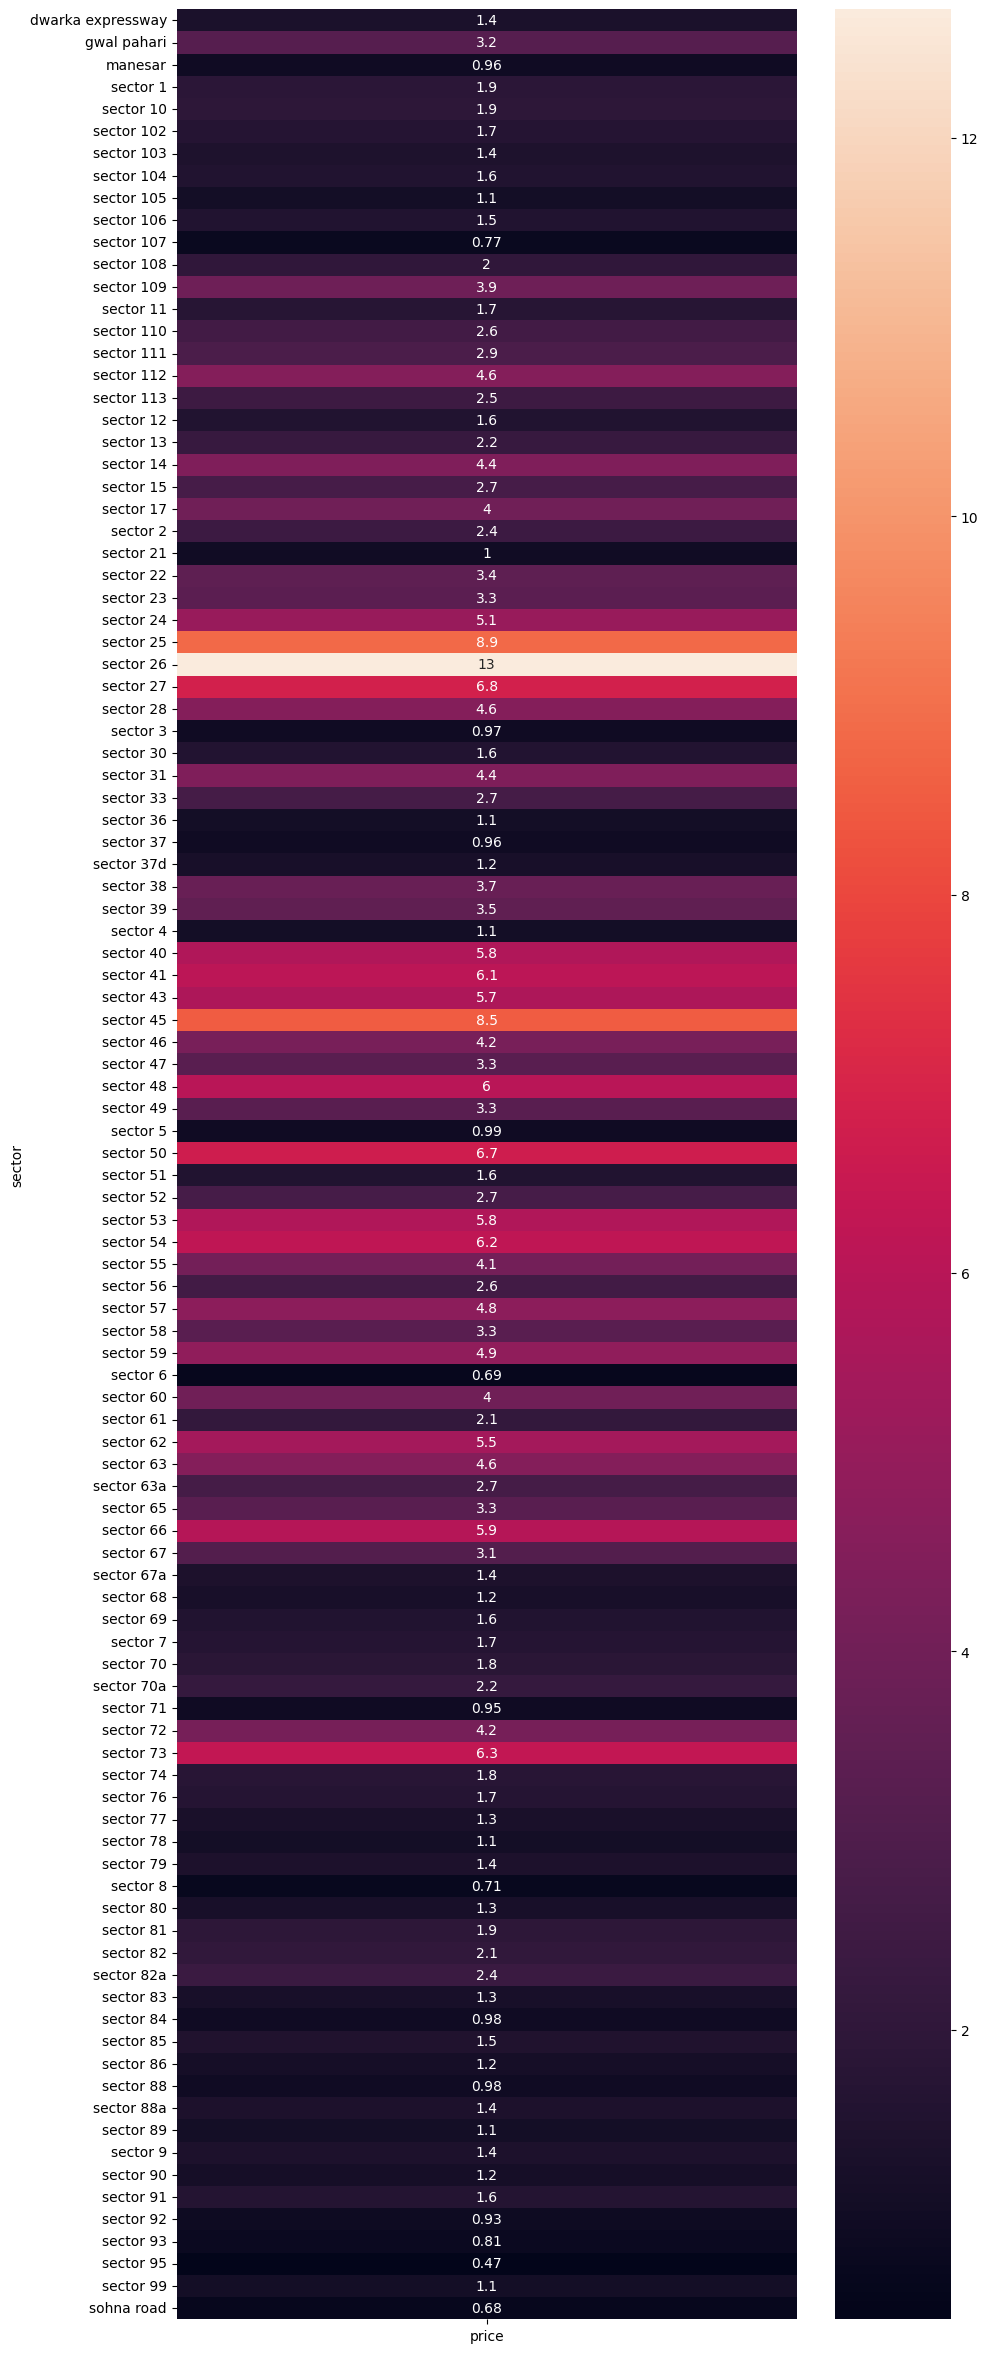

In [133]:
plt.figure(figsize=(10,30))
sns.heatmap(pd.pivot_table(avg_sector_price,index='sector',values='price'),annot=True)

# avg_agePossession_price

In [127]:
avg_agePossession_price =df.groupby('agePossession')['price'].mean().reset_index()

<Axes: ylabel='agePossession'>

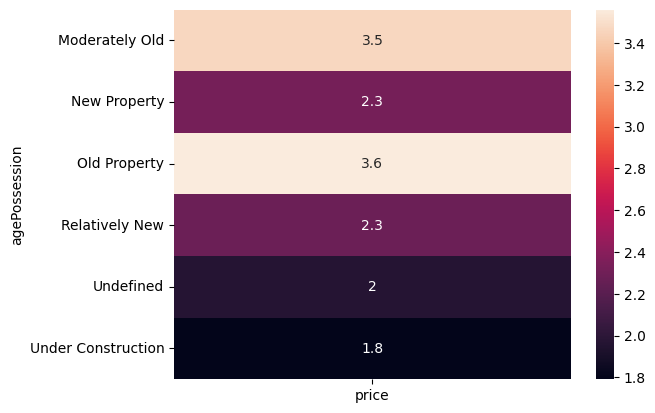

In [129]:
sns.heatmap(pd.pivot_table(avg_agePossession_price,index='agePossession',values='price'),annot=True)